<a href="https://colab.research.google.com/github/Rohit0562-hub/2513246_RohitJoshi/blob/main/2513246_RohitJoshi_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Concept And Technologies of AI/air_quality_health_dataset (2).csv")

In [3]:
df.head(5)

,city,date,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,population_density,hospital_capacity
0,Los Angeles,2020-01-01,65,34.0,52.7,2.2,38.5,33.5,33,5,Rural,1337
1,Beijing,2020-01-02,137,33.7,31.5,36.7,27.5,-1.6,32,4,Urban,1545
2,London,2020-01-03,266,43.0,59.6,30.4,57.3,36.4,25,10,Suburban,1539
3,Mexico City,2020-01-04,293,33.7,37.9,12.3,42.7,-1.0,67,10,Urban,552
4,Delhi,2020-01-05,493,50.3,34.8,31.2,35.6,33.5,72,9,Suburban,1631


In [4]:
df.tail(5)

,city,date,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,population_density,hospital_capacity
88484,Tokyo,2262-04-06,22,23.4,53.4,24.3,58.9,9.1,55,5,Suburban,419
88485,Delhi,2262-04-07,170,48.0,32.4,25.0,15.7,5.6,40,10,Urban,695
88486,Delhi,2262-04-08,307,46.7,21.8,31.9,45.1,9.5,44,12,Urban,245
88487,Beijing,2262-04-09,65,31.9,26.0,38.1,53.0,17.8,46,11,Suburban,1291
88488,Mexico City,2262-04-10,59,41.8,50.1,31.2,52.0,25.0,65,8,Urban,983


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88489 entries, 0 to 88488
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 88489 non-null  object 
 1   date                 88489 non-null  object 
 2   aqi                  88489 non-null  int64  
 3   pm2_5                88489 non-null  float64
 4   pm10                 88489 non-null  float64
 5   no2                  88489 non-null  float64
 6   o3                   88489 non-null  float64
 7   temperature          88489 non-null  float64
 8   humidity             88489 non-null  int64  
 9   hospital_admissions  88489 non-null  int64  
 10  population_density   88489 non-null  object 
 11  hospital_capacity    88489 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 8.1+ MB


In [6]:
df.shape

(88489, 12)

In [7]:
df.isnull().sum()

,0
city,0
date,0
aqi,0
pm2_5,0
pm10,0
no2,0
o3,0
temperature,0
humidity,0
hospital_admissions,0


In [8]:
df.duplicated().sum()

np.int64(0)

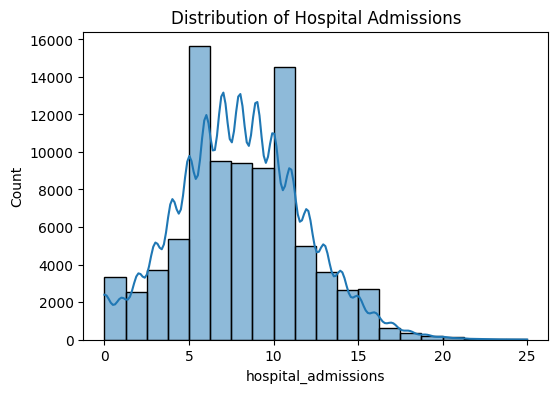

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df['hospital_admissions'], bins=20, kde=True)
plt.title("Distribution of Hospital Admissions")
plt.show()

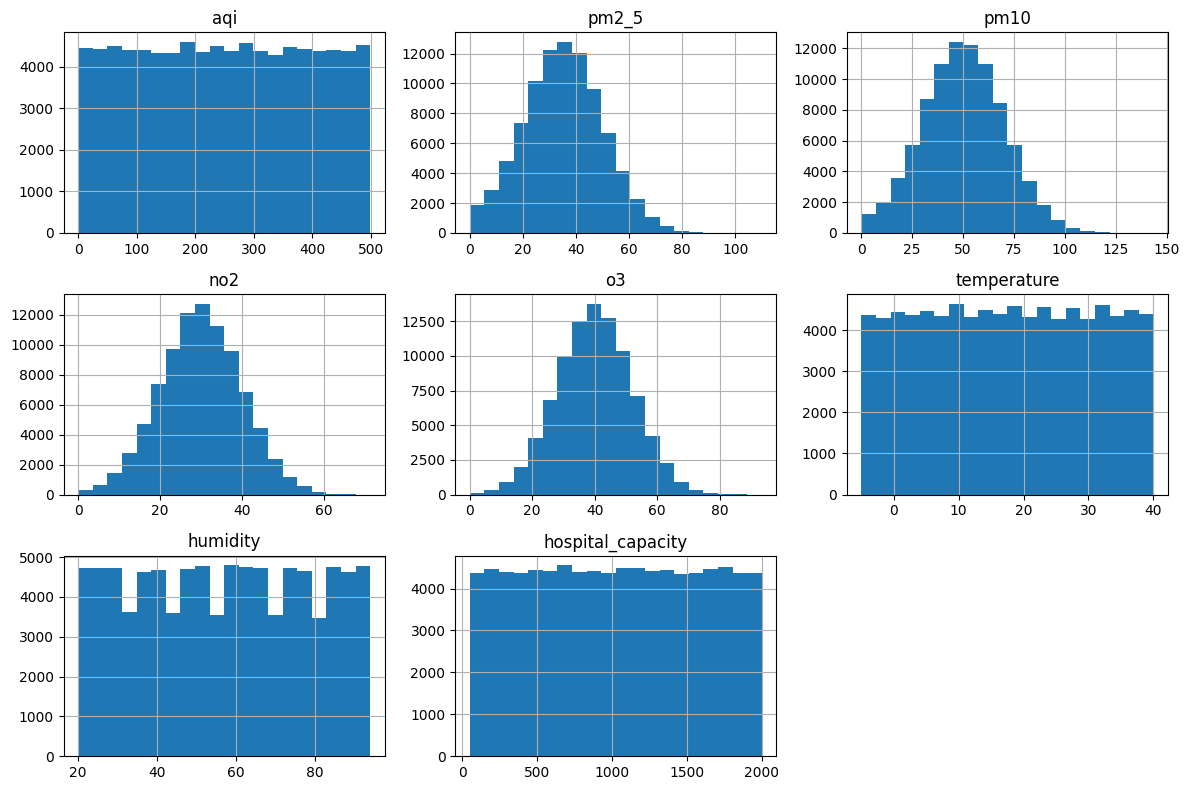

In [10]:
numerical_cols = [
    'aqi', 'pm2_5', 'pm10', 'no2', 'o3',
    'temperature', 'humidity', 'hospital_capacity'
]

df[numerical_cols].hist(figsize=(12,8), bins=20)
plt.tight_layout()
plt.show()


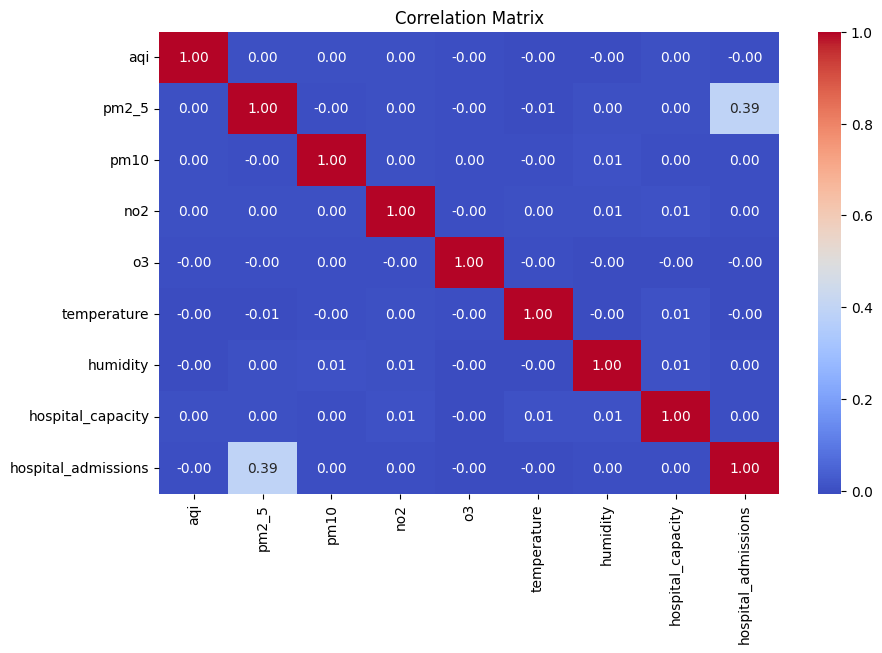

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols + ['hospital_admissions']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


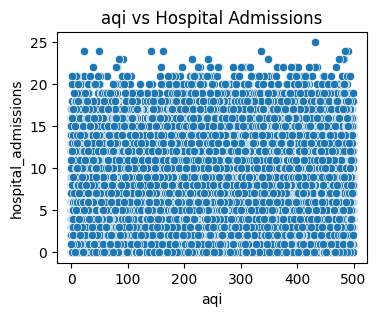

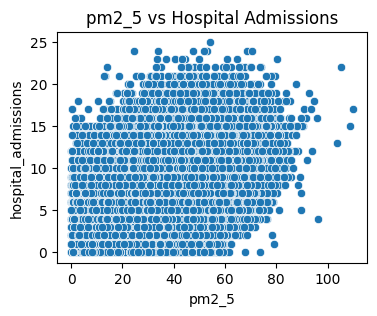

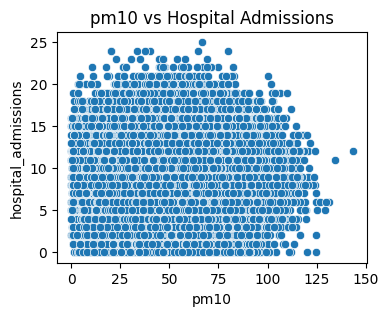

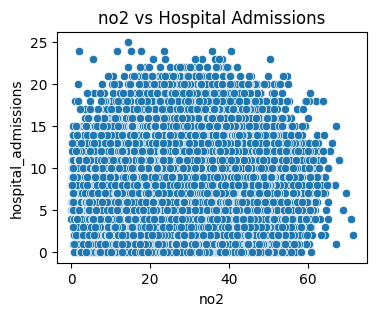

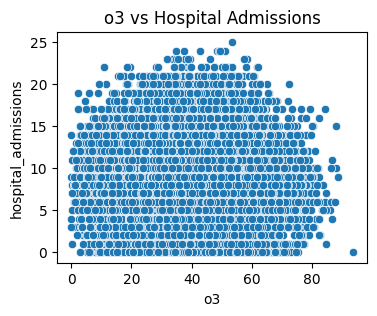

In [12]:
for col in ['aqi', 'pm2_5', 'pm10', 'no2', 'o3']:
    plt.figure(figsize=(4,3))
    sns.scatterplot(x=df[col], y=df['hospital_admissions'])
    plt.title(f"{col} vs Hospital Admissions")
    plt.show()

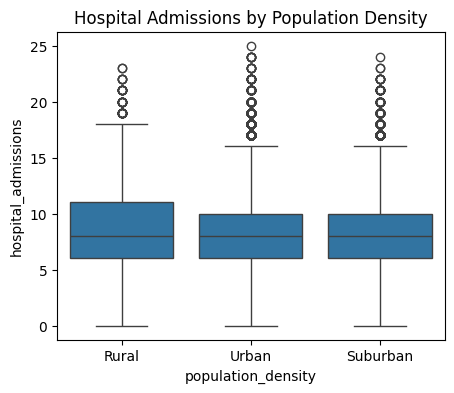

In [13]:
plt.figure(figsize=(5,4))
sns.boxplot(x='population_density', y='hospital_admissions', data=df)
plt.title("Hospital Admissions by Population Density")
plt.show()

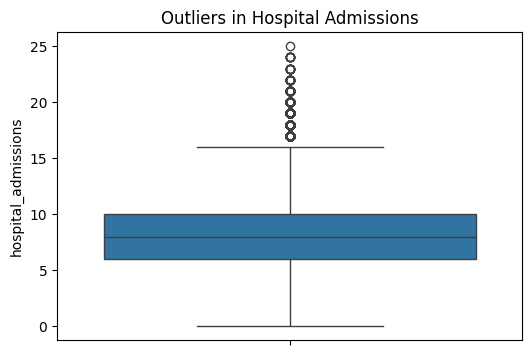

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['hospital_admissions'])
plt.title("Outliers in Hospital Admissions")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [24]:
df_model = df.drop(columns=['date'])

le = LabelEncoder()
df_model['population_density'] = le.fit_transform(df_model['population_density'])

features = [
    'aqi', 'pm2_5', 'pm10', 'no2', 'o3',
    'temperature', 'humidity', 'population_density'
]

X = df_model[features]
y = df_model['hospital_admissions']


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),  # 2 hidden layers
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

mlp.fit(X_train_scaled, y_train)

MLPRegressor(early_stopping=True, hidden_layer_sizes=(64, 32), max_iter=300,
             random_state=42)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = mlp.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MLP MSE: {mse:.2f}")
print(f"MLP RMSE: {rmse:.2f}")
print(f"MLP R²: {r2:.3f}")

MLP MSE: 11.63
MLP RMSE: 3.41
MLP R²: 0.152


In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

features = ['aqi', 'pm2_5', 'pm10', 'no2', 'o3',
            'temperature', 'humidity', 'hospital_capacity']

X = df[features]
y = df['hospital_admissions']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [19]:
y_pred = lr_model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression RMSE: {rmse:.2f}")
print(f"Linear Regression R²: {r2:.3f}")

Linear Regression RMSE: 3.40
Linear Regression R²: 0.156


In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Drop irrelevant columns
df_model = df.drop(columns=['date', 'city'])

# Encode population_density (Urban/Suburban/Rural → numeric)
le = LabelEncoder()
df_model['population_density'] = le.fit_transform(df_model['population_density'])

# Features and target
features = ['aqi', 'pm2_5', 'pm10', 'no2', 'o3',
            'temperature', 'humidity', 'population_density']
X = df_model[features]
y = df_model['hospital_admissions']


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [22]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest RMSE: {rmse:.2f}")
print(f"Random Forest R²: {r2:.3f}")

Random Forest RMSE: 3.43
Random Forest R²: 0.140


In [32]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}

rf_cv = GridSearchCV(
    rf,
    rf_params,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

rf_cv.fit(X_train, y_train)
print("Best RF params:", rf_cv.best_params_)
print("Best RF CV RMSE:", -rf_cv.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best RF params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best RF CV RMSE: 3.4186481006815344


In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

ridge_params = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

ridge_cv = GridSearchCV(
    ridge,
    ridge_params,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

ridge_cv.fit(X_train_scaled, y_train)

print("Best Ridge alpha:", ridge_cv.best_params_['alpha'])
print("Best Ridge CV RMSE:", -ridge_cv.best_score_)

Best Ridge alpha: 10
Best Ridge CV RMSE: 3.4214261868344336


In [35]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

# Ridge estimator (best tuned from GridSearchCV)
ridge_best = ridge_cv.best_estimator_

# Cross-validation splitter
cv = KFold(5)

# RFECV for Ridge
selector_ridge = RFECV(
    estimator=ridge_best,
    step=1,
    cv=cv,
    scoring='neg_root_mean_squared_error'
)

selector_ridge.fit(X_train_scaled, y_train)

# Selected features
selected_features_ridge = np.array(features)[selector_ridge.support_]
print("Ridge selected features:", selected_features_ridge)
print("Optimal number of features (Ridge):", selector_ridge.n_features_)


Ridge selected features: ['pm2_5']
Optimal number of features (Ridge): 1


In [36]:
rf_best = rf_cv.best_estimator_

selector_rf = RFECV(
    estimator=rf_best,
    step=1,
    cv=cv,
    scoring='neg_root_mean_squared_error'
)

selector_rf.fit(X_train, y_train)

selected_features_rf = np.array(features)[selector_rf.support_]
print("RF selected features:", selected_features_rf)
print("Optimal number of features (RF):", selector_rf.n_features_)


RF selected features: ['aqi' 'pm2_5' 'pm10' 'no2' 'o3']
Optimal number of features (RF): 5


In [38]:
# Selected feature for Ridge
ridge_features = ['pm2_5']

# Extract train/test subsets
X_train_ridge = X_train_scaled[:, [features.index(f) for f in ridge_features]]
X_test_ridge = X_test_scaled[:, [features.index(f) for f in ridge_features]]

# Best Ridge model from GridSearchCV
ridge_best = ridge_cv.best_estimator_

# Retrain Ridge on selected feature
ridge_best.fit(X_train_ridge, y_train)

# Predict and evaluate
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred_ridge = ridge_best.predict(X_test_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge RMSE (selected feature):", rmse_ridge)
print("Ridge R² (selected feature):", r2_ridge)

Ridge RMSE (selected feature): 3.403372971664206
Ridge R² (selected feature): 0.1559371848664297


In [40]:
# Selected features for RF
rf_features = ['aqi', 'pm2_5', 'pm10', 'no2', 'o3']

# Select columns properly
X_train_rf = X_train[rf_features]
X_test_rf = X_test[rf_features]

# Best RF model from GridSearchCV
rf_best = rf_cv.best_estimator_

# Retrain RF on selected features
rf_best.fit(X_train_rf, y_train)

# Predict and evaluate
y_pred_rf = rf_best.predict(X_test_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("RF RMSE (selected features):", rmse_rf)
print("RF R² (selected features):", r2_rf)


RF RMSE (selected features): 3.3953375439822784
RF R² (selected features): 0.15991817611987447
